<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:right;border-radius:5px 5px;">
    <i>Aprender una técnica no es un fin en si mismo, simplemente indica por donde hay que empezar</i><br><b>Proverbio Japonés</b></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>Generación de Datos Sintéticos</strong></p> 

<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Bibliotecas necesarias para ejecutar el notebook</strong><br> 
<ol style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<li>pandas</li> 
<li>numpy</li> 
<li>matplotlib</li>
<li>collections</li>
<li>joblib</li>    
<li>warnings</li> 
<li>imblearn</li>     
</ol>
</p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

In [1]:
import pandas as pd
#Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}') 

Pandas Version: 1.0.5


In [2]:
import numpy as np

np.set_printoptions(suppress=True)

# En produccion eliminar, se incluye por informacion
print(f'Numpy version: {np.__version__}')

Numpy version: 1.19.5


In [3]:
# En produccion eliminar, se incluye por informacion
import matplotlib
print(f'Matplotlib version: {matplotlib.__version__}')

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)

Matplotlib version: 3.5.1


In [4]:
from collections import Counter

In [5]:
import joblib as jb
print(f'Joblib Version: {jb.__version__}') 

Joblib Version: 1.0.1


In [6]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
import imblearn
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
print(imblearn.__version__)

0.7.0


<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

In [7]:
df = jb.load(filename='./data/produccion-de-pozos-de-gas-y-petrleo-no-convencionalV2.bin')

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:left;border-radius:5px 5px;">
<strong>Visualizar las primeras 5 filas  del dataset</strong></p> 

In [8]:
df.head()

idempresa  idpozo  prod_pet  prod_gas  prod_agua  iny_agua  iny_gas    tef  \
0         36  137601     89.25    914.64      26.56       0.0      0.0  30.12   
1         36  129861     26.00    306.78       9.32       0.0      0.0  29.56   
2         36  131429      0.94     15.45       0.22       0.0      0.0   2.00   
3         36  143846     73.39   1009.07      43.77       0.0      0.0  30.96   
4         36  132492     12.49     65.95       4.47       0.0      0.0  31.00   

   tipoextraccion  tipoestado  tipopozo  profundidad  formacion  \
0              11           9         0       3785.0          7   
1              11           9         0       3815.0          7   
2              11           9         0       3800.0          7   
3              11           9         0       3949.0          7   
4               8           9         0       2752.0         15   

   areayacimiento  cuenca  provincia  coordenadax  coordenaday  clasificacion  \
0              70       2          3      -67.838      -39.019              1   
1              70       2          3      -67.888      -39.015              1   
2              70       2          3      -67.874      -39.013              1   
3              70       2          3      -67.834      -39.030              1   
4             122       2          2      -69.185      -39.078              1   

   subclasificacion fecha_data  
0                 2 2015-01-31  
1                 2 2015-01-31  
2                 2 2015-01-31  
3                 2 2015-01-31  
4                 2 2015-01-31

In [10]:
df2bal = df.iloc[:, 1:7][df["idempresa"].isin([35])]

In [11]:
df2bal = df2bal.reset_index()

In [12]:
df2bal.drop('index', axis=1, inplace=True)

In [13]:
df2bal.head(10)

idpozo  prod_pet  prod_gas  prod_agua  iny_agua  iny_gas
0  145387       0.0       0.0        0.0       0.0      0.0
1  145090       0.0       0.0        0.0       0.0      0.0
2  145089       0.0       0.0        0.0       0.0      0.0
3  145088       0.0       0.0        0.0       0.0      0.0
4  144263       0.0       0.0        0.0       0.0      0.0
5  137745       0.0       0.0        0.0       0.0      0.0
6  144655       0.0       0.0        0.0       0.0      0.0
7  137238       0.0       0.0        0.0       0.0      0.0
8  144386       0.0       0.0        0.0       0.0      0.0
9  137610       0.0       0.0        0.0       0.0      0.0

In [14]:
df2bal = df2bal.loc[~((df2bal['prod_pet'] == 0.0) & (df2bal['prod_gas'] == 0.0))]

In [15]:
df2bal.shape

(100002, 6)

In [16]:
dfCount = df2bal.groupby(["idpozo"])["idpozo"].count()
for index, value in dfCount.items():
    if value <10:
        df2bal.drop(df2bal[df2bal["idpozo"] == index].index, inplace=True)
dfCount = df2bal.groupby(["idpozo"])["idpozo"].count()        

In [17]:
len(df2bal.groupby(["idpozo"])["idpozo"].count())

1626

In [18]:
dfCount.sort_values(ascending=False)

idpozo
114888    188
129763    165
130465    164
130482    162
131288    159
         ... 
162558     10
162559     10
162560     10
162561     10
162578     10
Name: idpozo, Length: 1626, dtype: int64

In [19]:
df2bal.iloc[:, 1:6].head()

prod_pet  prod_gas  prod_agua  iny_agua  iny_gas
121      0.00    264.02       0.00       0.0      0.0
122      0.00    222.06       0.00       0.0      0.0
124      0.00     13.52       0.00       0.0      0.0
127     12.79      0.00      27.07       0.0      0.0
128      2.43    339.94      79.26       0.0      0.0

In [20]:
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(df2bal.iloc[:, 1:6], df2bal['idpozo'])

In [21]:
len(X_resampled)

305688

In [22]:
X_resampled['idpozo'] = y_resampled

In [23]:
X_resampled.head()

prod_pet  prod_gas  prod_agua  iny_agua  iny_gas  idpozo
0      0.00    264.02       0.00       0.0      0.0  114880
1      0.00    222.06       0.00       0.0      0.0  114867
2      0.00     13.52       0.00       0.0      0.0  115664
3     12.79      0.00      27.07       0.0      0.0  115734
4      2.43    339.94      79.26       0.0      0.0  115725

In [24]:
Counter(df2bal['idpozo'])

Counter({114880: 32,
         114867: 28,
         115664: 116,
         115734: 100,
         115725: 34,
         114888: 188,
         116022: 47,
         124664: 84,
         130329: 98,
         130482: 162,
         130465: 164,
         129763: 165,
         131600: 87,
         131288: 159,
         131291: 149,
         135147: 81,
         136897: 126,
         136381: 95,
         136895: 121,
         135484: 116,
         135480: 134,
         136211: 119,
         135925: 95,
         135803: 134,
         136203: 131,
         136060: 131,
         136044: 45,
         136735: 126,
         136402: 117,
         136404: 123,
         136464: 70,
         136469: 10,
         136725: 50,
         136589: 128,
         136588: 85,
         136732: 22,
         136997: 113,
         136996: 86,
         137008: 106,
         136465: 26,
         144384: 104,
         143875: 69,
         144264: 33,
         144265: 110,
         143870: 77,
         137392: 117,
         

In [25]:
Counter(X_resampled['idpozo'])

Counter({114880: 188,
         114867: 188,
         115664: 188,
         115734: 188,
         115725: 188,
         114888: 188,
         116022: 188,
         124664: 188,
         130329: 188,
         130482: 188,
         130465: 188,
         129763: 188,
         131600: 188,
         131288: 188,
         131291: 188,
         135147: 188,
         136897: 188,
         136381: 188,
         136895: 188,
         135484: 188,
         135480: 188,
         136211: 188,
         135925: 188,
         135803: 188,
         136203: 188,
         136060: 188,
         136044: 188,
         136735: 188,
         136402: 188,
         136404: 188,
         136464: 188,
         136469: 188,
         136725: 188,
         136589: 188,
         136588: 188,
         136732: 188,
         136997: 188,
         136996: 188,
         137008: 188,
         136465: 188,
         144384: 188,
         143875: 188,
         144264: 188,
         144265: 188,
         143870: 188,
         1

<IPython.core.display.Javascript object>

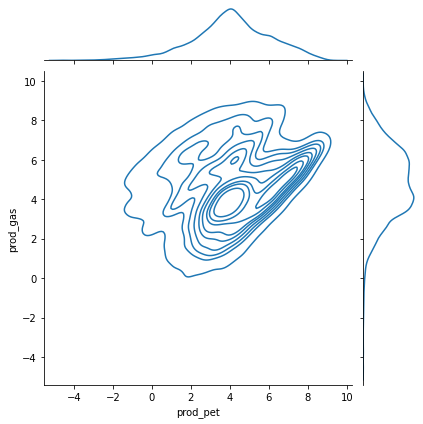

In [30]:
sns.jointplot(x=np.log(df2bal["prod_pet"]),y=np.log(df2bal["prod_gas"]), kind='kde');

<IPython.core.display.Javascript object>

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


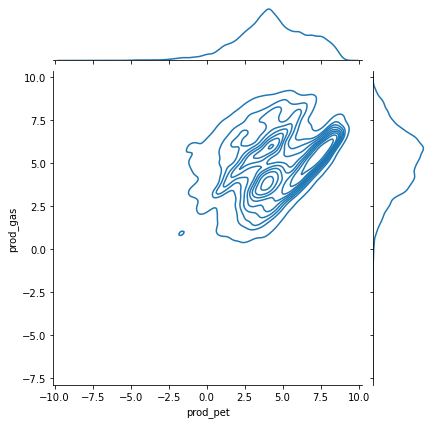

In [32]:
sns.jointplot(x=np.log(X_resampled["prod_pet"]),y=np.log(X_resampled["prod_gas"]), kind='kde');

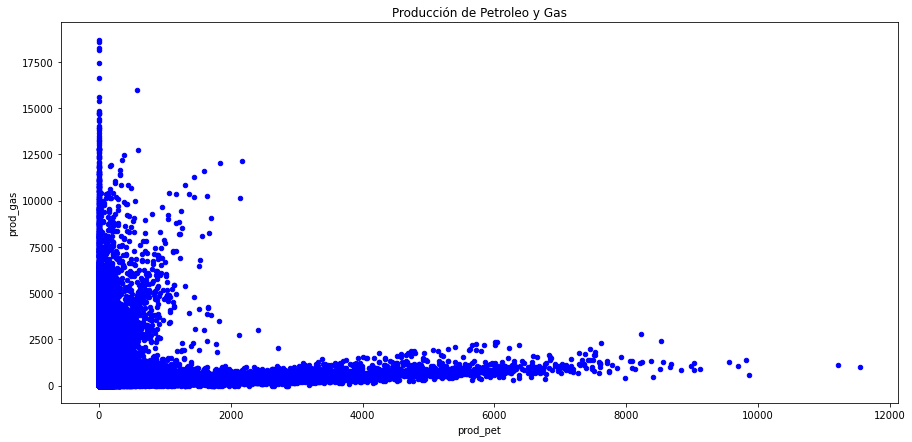

In [26]:
df2bal.loc[~((df2bal['prod_pet'] == 0.0) & (df2bal['prod_gas'] == 0.0))].plot(kind='scatter',x='prod_pet',y='prod_gas',color='blue')
plt.title('Producción de Petroleo y Gas')
plt.show();

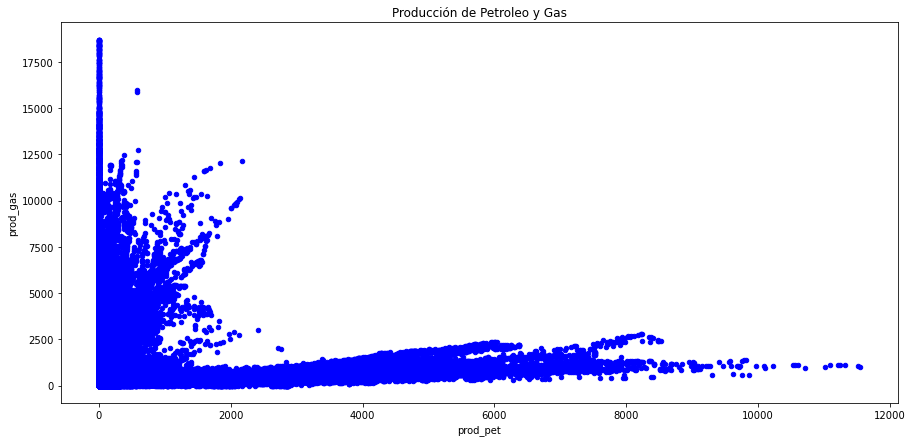

In [29]:
X_resampled.loc[~((X_resampled['prod_pet'] == 0.0) & (X_resampled['prod_gas'] == 0.0))].plot(kind='scatter',x='prod_pet',y='prod_gas',color='blue')
plt.title('Producción de Petroleo y Gas')
plt.show();

In [28]:
np.log(df2bal.loc[~(df2bal['prod_pet'] == 0.0)][['prod_pet']]).plot();

In [30]:
np.log(X_resampled.loc[~(X_resampled['prod_pet'] == 0.0)][['prod_pet']]).plot();

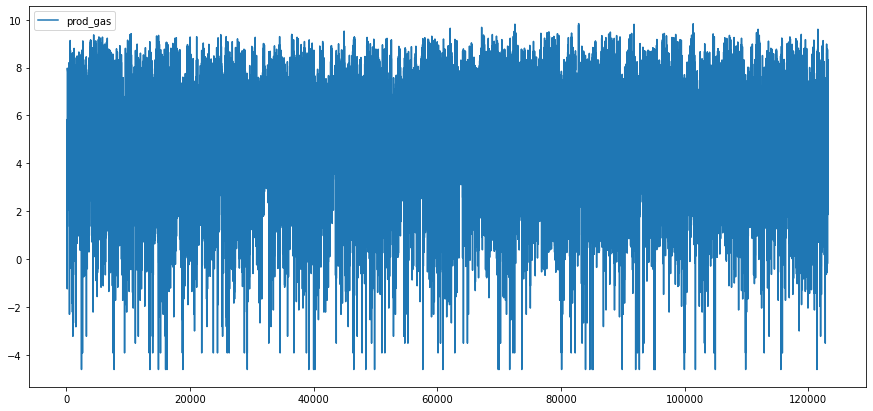

In [29]:
np.log(df2bal.loc[~(df2bal['prod_gas'] == 0.0)][['prod_gas']]).plot();

In [31]:
np.log(X_resampled.loc[~(X_resampled['prod_gas'] == 0.0)][['prod_gas']]).plot();

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

In [33]:
from imblearn.over_sampling import RandomOverSampler
oversampleRandomOverSampler = RandomOverSampler()
X_resampledRandomOverSampler, y_resampledRandomOverSampler = oversampleRandomOverSampler.fit_resample(df2bal.iloc[:, 1:6], df2bal['idpozo'])

In [34]:
len(X_resampledRandomOverSampler)

305688

In [35]:
X_resampledRandomOverSampler['idpozo'] = y_resampledRandomOverSampler

In [36]:
X_resampledRandomOverSampler.head()

prod_pet  prod_gas  prod_agua  iny_agua  iny_gas  idpozo
0      0.00    264.02       0.00       0.0      0.0  114880
1      0.00    222.06       0.00       0.0      0.0  114867
2      0.00     13.52       0.00       0.0      0.0  115664
3     12.79      0.00      27.07       0.0      0.0  115734
4      2.43    339.94      79.26       0.0      0.0  115725

In [37]:
Counter(X_resampledRandomOverSampler['idpozo'])

Counter({114880: 188,
         114867: 188,
         115664: 188,
         115734: 188,
         115725: 188,
         114888: 188,
         116022: 188,
         124664: 188,
         130329: 188,
         130482: 188,
         130465: 188,
         129763: 188,
         131600: 188,
         131288: 188,
         131291: 188,
         135147: 188,
         136897: 188,
         136381: 188,
         136895: 188,
         135484: 188,
         135480: 188,
         136211: 188,
         135925: 188,
         135803: 188,
         136203: 188,
         136060: 188,
         136044: 188,
         136735: 188,
         136402: 188,
         136404: 188,
         136464: 188,
         136469: 188,
         136725: 188,
         136589: 188,
         136588: 188,
         136732: 188,
         136997: 188,
         136996: 188,
         137008: 188,
         136465: 188,
         144384: 188,
         143875: 188,
         144264: 188,
         144265: 188,
         143870: 188,
         1

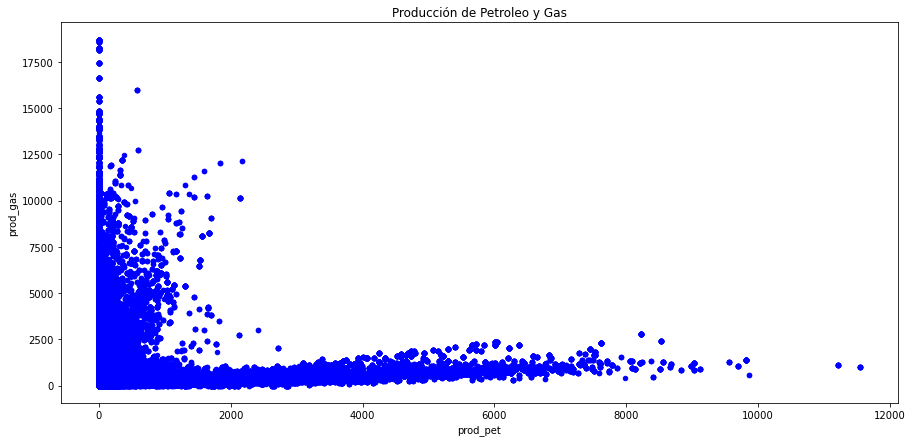

In [38]:
X_resampledRandomOverSampler.loc[~((X_resampledRandomOverSampler['prod_pet'] == 0.0) & (X_resampledRandomOverSampler['prod_gas'] == 0.0))].plot(kind='scatter',x='prod_pet',y='prod_gas',color='blue')
plt.title('Producción de Petroleo y Gas')
plt.show()

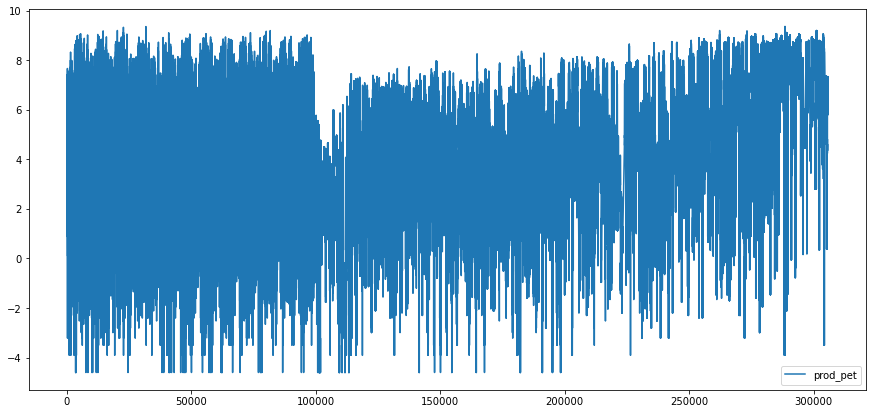

In [39]:
np.log(X_resampledRandomOverSampler.loc[~(X_resampledRandomOverSampler['prod_pet'] == 0.0)][['prod_pet']]).plot();

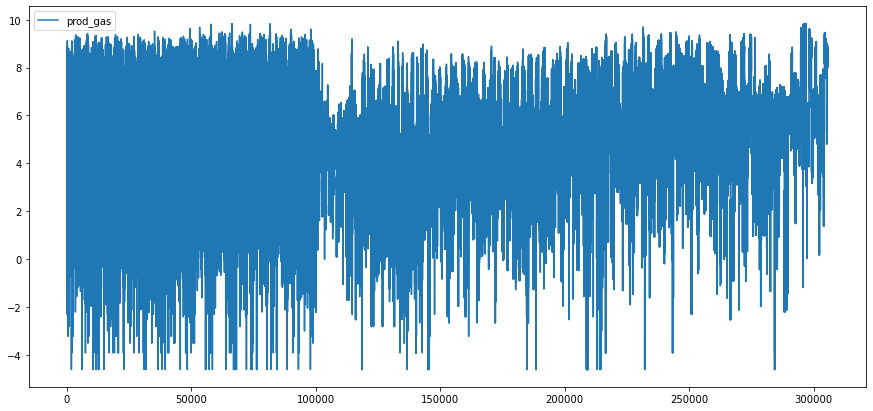

In [40]:
np.log(X_resampledRandomOverSampler.loc[~(X_resampledRandomOverSampler['prod_gas'] == 0.0)][['prod_gas']]).plot();

<IPython.core.display.Javascript object>

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Admin\.conda\envs\austral\lib\site-packages\numpy\core\function_base.py:144: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\Users\Admin\.conda\envs\austral\lib\site-packages\numpy\core\function_base.py:154: RuntimeWarning: invalid value encountered in add
  y += start
C:\Users\Admin\.conda\envs\austral\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


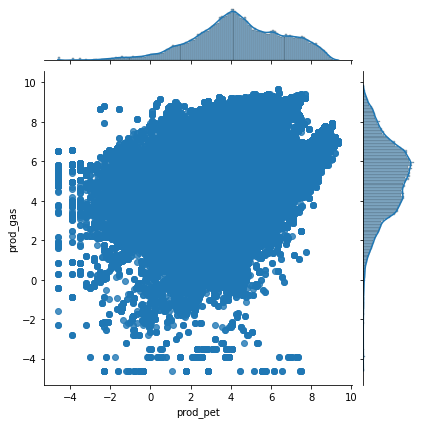

In [43]:
sns.jointplot(x=np.log(X_resampledRandomOverSampler["prod_pet"]), 
              y=np.log(X_resampledRandomOverSampler["prod_gas"]), kind='reg')

<IPython.core.display.Javascript object>

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


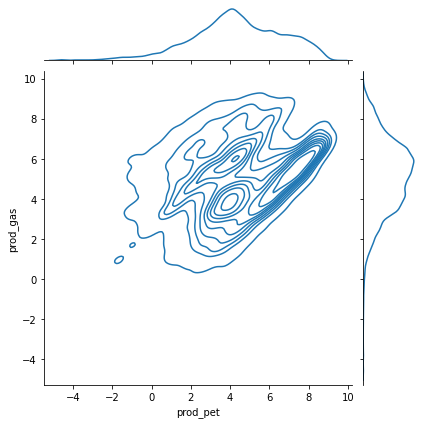

In [44]:
sns.jointplot(x=np.log(X_resampledRandomOverSampler["prod_pet"]),
              y=np.log(X_resampledRandomOverSampler["prod_gas"]), kind='kde')

<IPython.core.display.Javascript object>

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


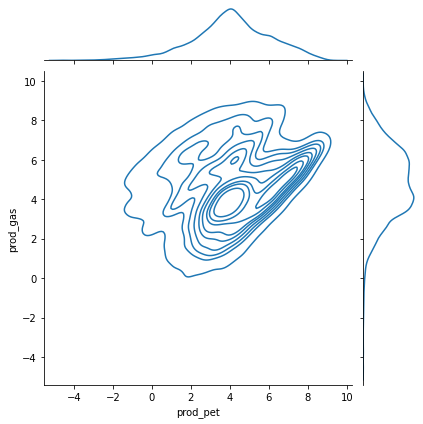

In [45]:
sns.jointplot(x=np.log(df2bal["prod_pet"]),
              y=np.log(df2bal["prod_gas"]), kind='kde')

<IPython.core.display.Javascript object>

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


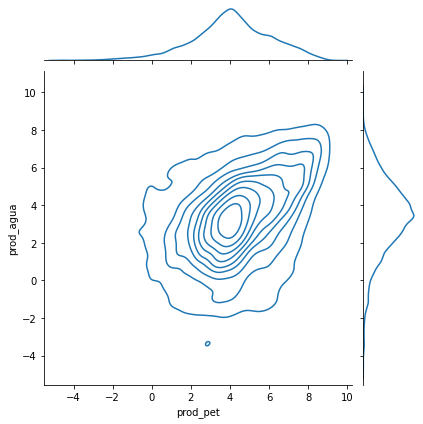

In [46]:
sns.jointplot(x=np.log(df2bal["prod_pet"]),
              y=np.log(df2bal["prod_agua"]), kind='kde')

<IPython.core.display.Javascript object>

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


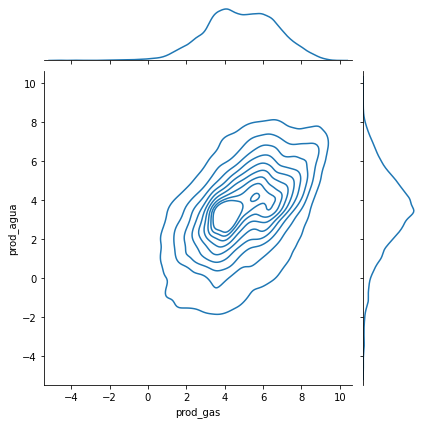

In [47]:
sns.jointplot(x=np.log(df2bal["prod_gas"]),
              y=np.log(df2bal["prod_agua"]), kind='kde')

<IPython.core.display.Javascript object>

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


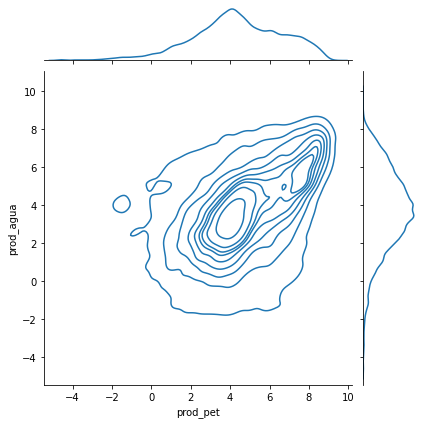

In [48]:
sns.jointplot(x=np.log(X_resampledRandomOverSampler["prod_pet"]),
              y=np.log(X_resampledRandomOverSampler["prod_agua"]), kind='kde')

<IPython.core.display.Javascript object>

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


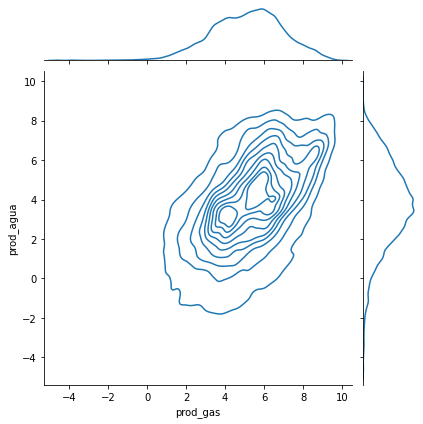

In [49]:
sns.jointplot(x=np.log(X_resampledRandomOverSampler["prod_gas"]),
              y=np.log(X_resampledRandomOverSampler["prod_agua"]), kind='kde')

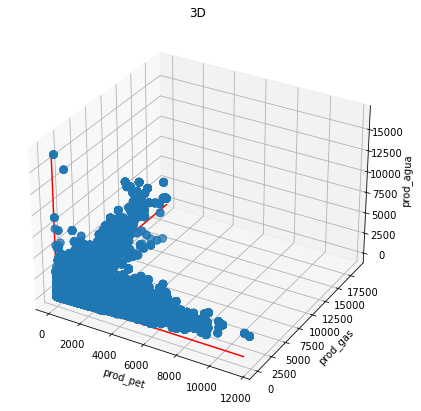

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_resampledRandomOverSampler['prod_pet'], 
           X_resampledRandomOverSampler['prod_gas'],
           X_resampledRandomOverSampler['prod_agua'], 
           cmap="Set2_r", s=60)


xAxisLine = ((min(X_resampledRandomOverSampler['prod_pet']), max(X_resampledRandomOverSampler['prod_pet'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(X_resampledRandomOverSampler['prod_gas']), max(X_resampledRandomOverSampler['prod_gas'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(X_resampledRandomOverSampler['prod_agua']), max(X_resampledRandomOverSampler['prod_agua'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 

ax.set_xlabel("prod_pet")
ax.set_ylabel("prod_gas")
ax.set_zlabel("prod_agua")
ax.set_title("3D")
plt.show()

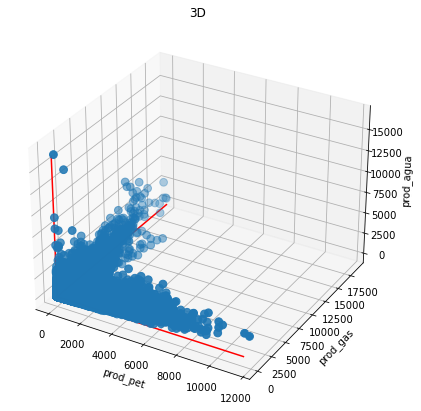

In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2bal['prod_pet'], 
           df2bal['prod_gas'],
           df2bal['prod_agua'], 
           cmap="Set2_r", s=60)


xAxisLine = ((min(df2bal['prod_pet']), max(df2bal['prod_pet'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(df2bal['prod_gas']), max(df2bal['prod_gas'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(df2bal['prod_agua']), max(df2bal['prod_agua'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 

ax.set_xlabel("prod_pet")
ax.set_ylabel("prod_gas")
ax.set_zlabel("prod_agua")
ax.set_title("3D")
plt.show()

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 

In [59]:
from imblearn.over_sampling import BorderlineSMOTE

In [60]:
oversampleBorderlineSMOTE = BorderlineSMOTE()
X_resampledorderlineSMOTE, y_resampledorderlineSMOTE = oversampleBorderlineSMOTE.fit_resample(df2bal.iloc[:, 1:6], df2bal['idpozo'])

In [66]:
X_resampledorderlineSMOTE.loc[~((X_resampledorderlineSMOTE['prod_pet'] == 0.0) & (X_resampledorderlineSMOTE['prod_gas'] == 0.0))].plot(kind='scatter',x='prod_pet',y='prod_gas',color='blue')
plt.title('Producción de Petroleo y Gas')
plt.show()